In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow_probability as tfp
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",", na_values=-200)
coldata = df["CO(GT)"].dropna().values
print(df)

            Date      Time  CO(GT)  ...      AH  Unnamed: 15  Unnamed: 16
0     10/03/2004  18.00.00     2.6  ...  0.7578          NaN          NaN
1     10/03/2004  19.00.00     2.0  ...  0.7255          NaN          NaN
2     10/03/2004  20.00.00     2.2  ...  0.7502          NaN          NaN
3     10/03/2004  21.00.00     2.2  ...  0.7867          NaN          NaN
4     10/03/2004  22.00.00     1.6  ...  0.7888          NaN          NaN
...          ...       ...     ...  ...     ...          ...          ...
9466         NaN       NaN     NaN  ...     NaN          NaN          NaN
9467         NaN       NaN     NaN  ...     NaN          NaN          NaN
9468         NaN       NaN     NaN  ...     NaN          NaN          NaN
9469         NaN       NaN     NaN  ...     NaN          NaN          NaN
9470         NaN       NaN     NaN  ...     NaN          NaN          NaN

[9471 rows x 17 columns]


In [ ]:
scale = MinMaxScaler()
normalise = scale.fit_transform(coldata.reshape(-1, 1))

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(normalise, normalise, batch_size = 32, epochs = 10, shuffle=True, verbose=1)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0148
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6293e-05
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5715e-06
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7731e-06
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7574e-07
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0949e-07
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9123e-08
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0555e-07
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0704e-08
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2241e-07


In [ ]:
predict = model.predict(normalise)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse = np.mean((normalise - reconstructed) ** 2, axis=1)

In [ ]:
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

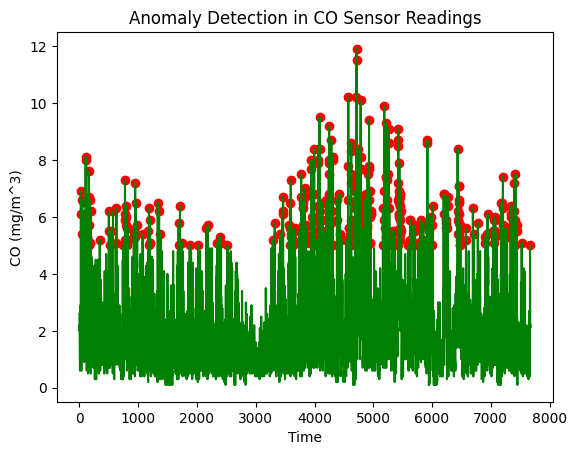

In [ ]:
plt.figure(225)
plt.plot(coldata, label="CO Reading", color='green')
anon = plt.scatter(np.where(anomalies)[0], coldata[anomalies], color='red', label="Anomalies")
plt.title("Anomaly Detection in CO Sensor Readings")
plt.xlabel("Time")
plt.ylabel("CO (mg/m^3)")
plt.show()